# Sinyallerin frekans spektrum analizi

<a href="https://colab.research.google.com/drive/11RAk0lBrSrNAWgFGAHkyCrsD4RVGGVeV?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sinyallerin frekans spektrum analizi

Bu defterde bir ayrık zaman sinyalinin spektrumunu incelemek/işlemek için gerekli altyapıyı örneklerle sunmaya çalışacağız. Önce sinüzoidal sinyallerle kontrollü deneyler yapacağız, ardından gerçek sinyallerin spektrumunu inceleyeceğiz. 

Elimizde hemen her zaman uzun süreli bir sinyalin kesiti bulunduğu (ya da küçük kesitler üzerinde analiz yapmayı tercih ettiğimiz) için sinyallerin pencerelenmesinin (kesitlere ayrılmasının, İng: windowing) spektruma etkisini inceleyeceğiz. Bunu yaparken ayrıca periyodik bir sinyali oluşturan öğelerin (öğe-1: periyodik uyarı ve öğe-2: uyarıdan çıktı üreten bir sistem) spektruma katkılarını da inceleyeceğiz. Ayrıca ardışık kesitlerin spektrumlarını birleştirerek oluşturulan spektrogram gösterimini de ele alacağız. Spektrogram, zaman-frekans iki boyutlu uzayında bir matris olup ses işleme konusundaki birçok güncel yapay zeka uygulamasında da temel girdi olarak kullanılmaktadır. 


### Sayısal Sinyallerin Fourier Dönüşümü

Fourier dönüşümlerini hesaplamak için [numpy.fft.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) fonksiyonunu kullanacağız. [Hızlı Fourier Dönüşümü (İng: Fast Fourier Transform)](https://en.wikipedia.org/wiki/Fast_Fourier_transform), ayrık zamanlı (sayısal) sinyallerimizin Fourier dönüşümünü (İng: [Discrete-time Fourier Transform, DTFT](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform)) hesaplamak için tasarlanmış, dönüşümün simetri özelliklerini kullanarak matris çarpımına kıyasla daha hızlı hesap yapılmasını sağlayan bir algoritmadır. 



### Sayısal sinyal spektrumunun özellikleri



**1) Sayısal bir sinyalin bileşenlerinin frekansları [0, $f_{örnekleme}/2$] arasında sınırlıdır:** 
Elimizdeki sinyaller ayrık zamanlı (sayısal) olduğu için içerebilecekleri bileşenlerin maksimum frekansı için sınır bulunmaktadır (en düşük periyot 2 örnek olabilir (bu en yüksek frekanslı bileşendir). Örnek üzerinden düşünelim: 1000 Hz'de örneklenmiş bir sinyalin ardışık noktaları arasındaki süre 1 milisaniyedir. Osilasyon için en azından 2 örneğe ihtiyaç vardır (her örnekte kendini tekrar eden bir sinyal osilasyon değil sabit bir değere karşılık gelir) ve bu 2 milisaniye uzunluğunda bir periyoda ve dolayısıyla 500Hz'lik bir sinyale karşılık gelir. Demek ki 1000 Hz örnekleme frekansı kullandığımızda temsil edebileceğimiz en yüksek frekansın 500 Hz olduğunu varsayarak hareket etmeliyiz. (Daha detaylı bir açıklama için [bakınız](http://www.dspguide.com/ch3/2.htm)) 

**2) Spektrum $f=0$'a göre simetriktir:** 

Elinizde bir gerçel (örnekleri gerçel sayılar olan) periyodik sinyal olduğunu düşünün. İçindeki periyodik bileşenlerden birisini $p_k[n] = A \cos{\omega_k n + \theta_k}$ olarak ifade edebiliriz. Bu eşitlik Euler denklemi kullanılarak şu şekilde ifade edilebilir: 


$A_k \cos{(\omega_k n + \theta_k)} = A_k \frac{{e^{j(\omega_k n + \theta_k)}} + {e^{-j(\omega_k n + \theta_k)}}}{2} $


$= \frac {A_k e^{j\theta_k}} {2} e^{j\omega_k n} + \frac {A_k e^{-j\theta_k}} {2} e^{-j\omega_k n} $


Bu bileşen için Fourier katsayılarımızın ($e^{j\omega_k n}$ ve $e^{-j\omega_k n}$ çarpanlarının); genliği aynı, fazı ters (negatif) veya diğer bir ifade ile kompleks eşlenik olduğunu görüyoruz. Aldığımız herhangi bir gerçel periyodik bileşen için gözlediğimiz bu simetri, birçok bileşenden oluşan sinyalimiz için de (eğer sinyalimiz gerçel ise) gözlenecektir. Spektrumda her $e^{j\omega_k n}$ için bir $e^{-j\omega_k n}$ göreceğiz ve katsayıları kompleks eşlenik olacaklar.

**3) Spektrum $\omega = 2 \pi$ ile periyodiktir:** 

Sayısal sinyallerin Fourier dönüşümleri söz konusu olduğunda diğer önemli özelliği örnekleme işlemi sebebiyle spektrumun periyodik (kendini tekrar eden yapıda) olmasıdır. [DTFT özelliklerini](https://www.pearsonhighered.com/assets/samplechapter/0/1/3/6/0136019250.pdf) incelediğinizde frekans ekseninin bu nedenle $w = [-\pi, \pi]$ aralığına sıkıştığını ve bu bölgedeki değerlerin $2\pi$ ile periyodik olduğunu görebilirsiniz (Aşağıdaki Şekil 4.1 üzerinde sol altta gösterilmektedir).

k tamsayı olmak üzere: $X(e^{jw}) = X(e^{j(w+k\times2\pi)})$


| <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Fourier_transform%2C_Fourier_series%2C_DTFT%2C_DFT.svg/1280px-Fourier_transform%2C_Fourier_series%2C_DTFT%2C_DFT.svg.png" width=550 height=300 /> |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------: |
| Şekil 4.1: _Fourier dönüşümü sonucu elde edilen spektrumun simetri özellikleri_|

Kısaca ifade etmek gerekirse, sayısal sinyallerin Fourier dönüşümü bize $2\pi$ ile periyodik sonsuz uzunlukta bir spektrum verir. Bizim için spektrum periyotlarından birisini bir dizide tutmak yeterlidir. Kuramsal açıklamalarda $w=[-\pi,\pi]$ aralığında ele aldığımız bir spektral periyodu, söz konusu pratik uygulamalar (programlama ile sinyal işleme) olduğunda, negatif endeksler kullanmak istemediğimiz için $w=[0, 2\pi]$ aralığında almayı tercih ederiz. Bu sebeple yukarıdaki Şekil 4.1'de sağ altta gösterildiği gibi **FFT fonksiyonları bize $w=[0, 2\pi]$ aralığındaki spektrumu, belirlediğimiz örnek sayısında (FFT nokta sayısı) bir dizi olarak döndürür.**

Burada pratik açısından önemli ilişkiyi tekrar vurgulayalım:

*   FFT sonucu $w=[0, 2\pi]$ aralığında spektrum döndürüyor. Maksimum frekansımız $w=\pi$, örnekleme frekansımız $w=2\pi$'ye karşılık geliyor. $N$ örnek kullandıysak $n.$ frekans örneğinin karşılık geldiği Hz cinsinden frekans değerini doğrusal orantı uygulayarak bulabiliriz. Örnek: 1000 Hz örnekleme frekansında bir sinyalin 512 noktalık FFT'sini hesapladığınızda elinizdeki spektrum noktaları içeren dizinin 10. örneği  10*1000/512 = 19.53 Hz'deki bileşenin ($e^{jw}$) genlik ve fazını temsil eden kompleks sayıdır.  

Aşağıda önce farklı sayıda nokta ile FFT hesaplayıp spektrumları inceleyeceğiz. Kütüphanelerimizi yükleyerek başlayalım.

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

İlk olarak sentetik sinyaller kullanarak kontrollü deney yapacağız. Aşağıdaki örneklerde tam 5 periyotluk birden fazla harmonik içeren bir sinyal kullanacağız ve analizlerimizde sadece frekans uzayında kullandığımız nokta sayısını değiştireceğiz. Hedefimiz adım adım bir sinyalin spektrumunda bulunan bileşenlerin kaynaklarını açıklayabileceğimiz bir kavrayışa erişmek. Bunun için her bir çizimi eksenleri ve içerdikleri bileşenler açısından detaylı inceleyiniz, üzerine düşününüz. 

10000Hz örnekleme frekansında, 200Hz temel titreşim frekansında olup 200Hz, 400Hz ve 800Hz'de harmonikler içeren bir sinyal oluşturup incelemeye başlayalım. 

Text(0.5, 0, 'Zaman (saniye)')

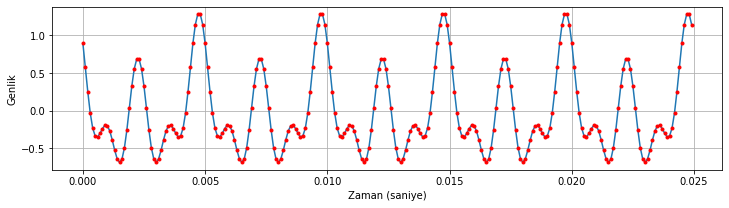

In [ ]:
ornekleme_fr = 10000 # örnekleme frekansı: 10kHz
f0 = 200 # temel titreşim frekansı: 200 Hz
dalga_sayisi = 5 # 5 tam dalga boyu uzunluğunda sinyal oluşturacağız

# Tam kat frekanslarda(0*f0, 1*f0, 2*f0, vb.) harmonik bileşenlerin genlikleri 
A = np.array([0, 0.3, 0.6, 0, 0.4, 0, 0])

T = 1 / ornekleme_fr # örnekleme periyodu
T0 = ornekleme_fr / f0 # sinyal temel titreşim periyodu
n = np.arange(T0 * dalga_sayisi) # tam 5 periyotluk uzunluk için örnek endeksleri oluşturuluyor 
t = n * T # zaman ekseninde her bir sinyal örneğinin denk geldiği an değerleri (saniye cinsinden)

# Sinyali(x) harmonikleri toplayarak oluşturalım
x = np.zeros_like(t) # kümülatif toplam yapmak için önce x'i sıfırlarla dolu bir şekilde oluşturuyoruz
for h in range(A.size):
  phase = h * np.pi / 10 # Her harmonik için farklı faz değeri kullanmak üzere yazılmış bir satır. Rasgele değerler de kullanabilirdik 
  x += A[h] * np.cos(2 * np.pi * (h * f0) * t + phase) # k. harmonik x sinyalinin üzerine toplanıyor

# Zaman ekseninde sinyalin çizdirilmesi
fig = plt.figure(figsize=(12, 3))
plt.plot(t, x); plt.plot(t, x, 'r.')
plt.grid()
plt.ylabel('Genlik')
plt.xlabel('Zaman (saniye)')

Şekil 4.2: Spektrumu incelenecek sentetik sinyal

Oluşturduğumuz sinyalin periyodu örnek sayısı cinsinden tamsayı ve toplam periyot sayısı da tamsayı olduğu için isterseniz bu sinyalin yanına kopyalarını ekleyerek uzatabilirsiniz. Sınırlarda kesiklilik oluşmayacaktır. Bu özelliğin spektruma etkisini birazdan göreceksiniz.

### Spektrum hesaplarken kullanılan örnek sayısı ile frekans uzayı ilişkisi

**Durum #1: fft_N = örnekleme frekansı**

Frekans uzayındaki nokta sayısının örnekleme frekansı ile aynı seçilmesi durumunda her frekans noktası 1 Hz'lik bir bandı temsil eder ([0, örnekleme frekansı] frekans bandını örnekleme frekansı adet nokta ile temsil etmiş oluruz). Bu özel tercih, frekans ekseninde endekslerle frekansları eşlediği için bileşenlerin hangi frekanslarda olduğunu incelemek istediğimizde görsel inceleme kolaylığı sağlar. 

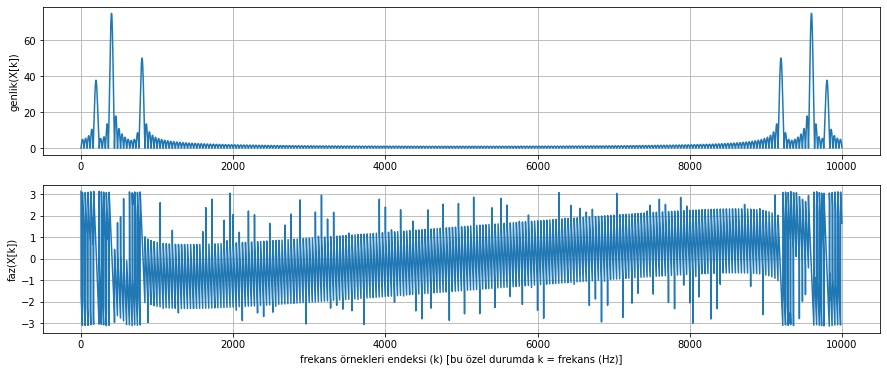

In [ ]:
fft_N = ornekleme_fr # frekans uzayında kullanacağımız nokta sayısı: N
X_F_10000 = np.fft.fft(x, fft_N)
genlik_spek = np.abs(X_F_10000)
faz_spek = np.angle(X_F_10000)

fig = plt.figure(figsize=(15,6))
plt.subplot(2,1,1)   
plt.plot(genlik_spek);
plt.ylabel('genlik(X[k])')
plt.grid(True);
plt.subplot(2,1,2)
plt.plot(faz_spek);
plt.ylabel('faz(X[k])')
plt.grid(True);
plt.xlabel('frekans örnekleri endeksi (k) [bu özel durumda k = frekans (Hz)]');

Şekil 4.3: Genlik ve faz spektrumu (fft_N = örnekleme frekansı)

Spektrumumuz merkeze (endeks = 5000) göre simetrik (genlik çift simetrik, faz tek simetrik (kompleks değerler eşlenik simetrik)). Kuramdan bildiğimiz üzere, çizdirdiğimiz bu spektrumun negatif ve pozitif frekans ekseninde sonsuz kopyası var, ancak kendini tekrar ettiği için tek bir periyodu çizdirmemiz yeterli. Hatta bu ilk örneklerden sonra (gerçek sinyaller için) simetrik olduğunu bildiğimiz spektrumun ilk yarısını çizdiriyor olacağız. Bu da [0, örnekleme frekansı / 2] frekans aralığına denk gelen bir çizim olacak. Diğer bir deyişle, verilen örnekleme frekansında temsil edilen en düşük ile en yüksek frekans arasındaki bir frekans bandı için çizim yapacak ve bu bandın simetrik kopyalarını (varlıklarını aklımızın bir köşesinde tutarak) çizimlerimizde gözardı edeceğiz. 

Buna ek olarak bundan sonraki örneklerde faz spektrumunu çizdirmeyeceğiz. Bunun temel sebepleri: 

*   fazın $[-\pi,\pi]$ aralığına katlanmış olması,
*   sinyalin z-transform sıfırlarının birim çembere çok yakın olması sonucu fazın o bölgelerde türevinin çok yüksek değerler alması

olarak açıklanabilir. Bu etkilerin bir sonucu olarak faz spektrumu hemen her zaman gözle inceleme için fazla karmaşık bir görünüme sahiptir. Gözlem için genlik spektrumu çizdirilip incelenmesi tercih edilir ve faz spektrumu gözardı edilir. 

Çizimi yaklaştırarak tepe noktalarının beklediğimiz frekanslarda(200 Hz, 400 Hz ve 800 Hz) olup olmadığına bakalım.

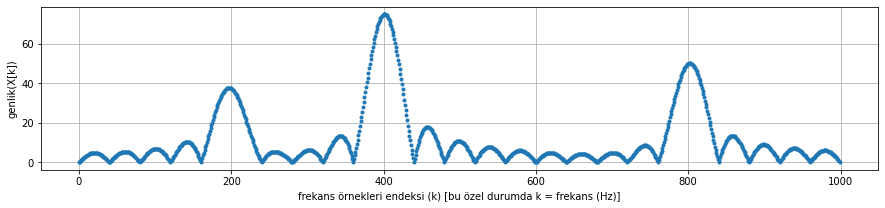

In [ ]:
fig = plt.figure(figsize=(15,3))
plt.plot(genlik_spek[:1000],'.');
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k) [bu özel durumda k = frekans (Hz)]')
plt.grid(True);

Şekil 4.4: Genlik spektrumu (fft_N = örnekleme frekansı), yakınlaştırılmış

Bu örnekte spektrumda harmoniklerin bulunduğu frekanslarda tepeler bulunduğunu gözlüyoruz. Bu beklediğimiz bir durum. Ancak burada ilginç olan o noktaların dışında da bileşenler gözlememiz. Hatta bu bileşenler tanıdığımız bir formdalar: sinc fonksiyonları formundalar. 200, 400 ve 800 Hz'de birer bileşenimiz var ve spektrumda bu frekanslarda sinc fonksiyonları gözledik. Neden olduğu üzerine düşünün. Açıklamamızı, ileride pencereleme işleminin gözlenen spektruma etkisini incelediğimiz kısımda sunacağız.  

**Durum #2: fft_n = $2^k$**

Hızlı dönüşüm (Fast Fourier Transform) için (dönüşümün simetri özellikleri kullanılarak yapılıyor olması sebebiyle) tercih edilen $2^k$ (k tamsayı) sayıda frekans noktasının kullanılması. 

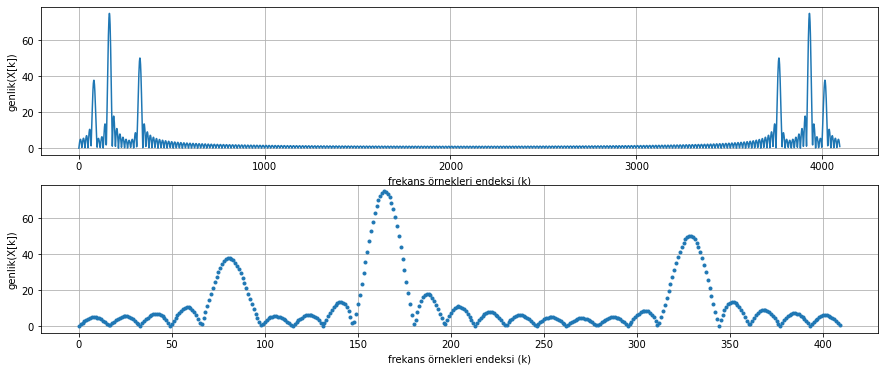

In [ ]:
fft_N = 4096 # 2'nin tamsayı üssü bir değer seçtik
X_F_4096 = np.fft.fft(x, fft_N)
genlik_spek = np.abs(X_F_4096)

fig = plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)   
plt.plot(genlik_spek);
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);
plt.subplot(2, 1, 2)
plt.plot(genlik_spek[:410], '.'); # spektrumun ilk kısmına yakınlaştırarak çizim
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);

Şekil 4.5: Genlik spektrumu (fft_N = $2^k$)

Bu çizimde frekans ekseninde gözlediğimiz değerler doğrudan frekans(Hz)'a denk gelmiyor. Çünkü [0-örnekleme frekansı] aralığını 4096 nokta ile temsil ettik. Tepe noktaları şu frekanslara karşılık geliyor olmalı: 200 Hz, 400 Hz and 800 Hz.

Frekans uzayında noktalar eşit aralıklar ile seçildiği için örnek endeksi ile karşılık geldiği frekans değeri arasında bir doğrusal ilişki olduğundan bahsetmiştik. 

Sinyallerin spektrum analizi yönünde bir adım atmak için bu spektrumda tepe noktalarının karşılık geldiği frekansları bulan (harmonik frekanslarını spektrumdan hesaplayan/kestiren) bir kod parçası yazmaya çalışalım. Otomatik olarak tepe noktalarının endekslerini bulan bir fonksiyon tanımlayıp kullanacağız. Sonra da (son satırda) tepe endekslerinden yola çıkarak frekansları tespit edip yazdıracağız. Spektrumda çok sayıda tepe olduğu için elle seçtiğimiz bir eşik değerini kullanacak ve bu değerin altındaki tepe noktalarını gözardı edeceğiz.

In [ ]:
def tepe_noktalarini_bul(sig, esik_deger):
    '''
    Verilen bir sinyaldeki tepe noktalarının endeksilerini kural temelli bulan fonksiyon
    Tepe: kendisinden önceki ve sonraki değerden yüksek değere sahip örnek
    `Tepe`lerin endeksleri üstteki kural kontrol edilerek bulunmaktadır 
    '''
    tepe_endeksleri = [] # tepe endekslerinin taşıyacak liste
    for k in range(1,sig.size-1): # noktanın öncesi ve sonrasındaki değerler kullanıldığı için (1,sig.size-1) alındı
        # Tepe noktası: kendinden önceki ve sonraki değere eşit veya daha yüksek ve verili eşik değerinden yüksek örnek
        if sig[k] >= sig[k-1] and sig[k] >= sig[k+1] and sig[k] > esik_deger:
            tepe_endeksleri.append(k)
    return np.array(tepe_endeksleri)

esik_deger = 25 # bu örneğe özel gözlemle eşik değeri seçtik
tepe_endeksleri = tepe_noktalarini_bul(genlik_spek[:fft_N//2], esik_deger) # spektrum simetrik olduğu için ilk yarısındaki tepeleri bulmak yeterli
print('Tepe noktaları endeksleri:', tepe_endeksleri)
print('Tepe noktalarına karşılık gelen frekans değerleri', tepe_endeksleri * ornekleme_fr / fft_N, 'Hz')

Tepe noktaları endeksleri: [ 81 164 329]
Tepe noktalarına karşılık gelen frekans değerleri [197.75390625 400.390625   803.22265625] Hz


fft_N = ornekleme_fr ve fft_N = 4096 kullanılan çizimleri karşılaştırdığımızda: 


*   Daha fazla nokta kullanmak bize ek bilgi sağlamadı. (Her iki durumda da frekans uzayında sinyalin zamandaki örnek sayısından fazla örnek kullanıyoruz) 


**Durum #3: fft_n = sinyaldeki (zaman uzayındaki) örnek sayısı**
Şimdi frekans uzayını zaman uzayındaki ile aynı sayıda örnekle temsil edelim ve otomatik tepe bulma fonksiyonunu kullanarak spektrumdan harmonik frekanslarını kestirmeye çalışalım.

Tepe noktaları endeksleri: [ 5 10 20]
Tepe noktalarına karşılık gelen frekans değerleri [200. 400. 800.] Hz


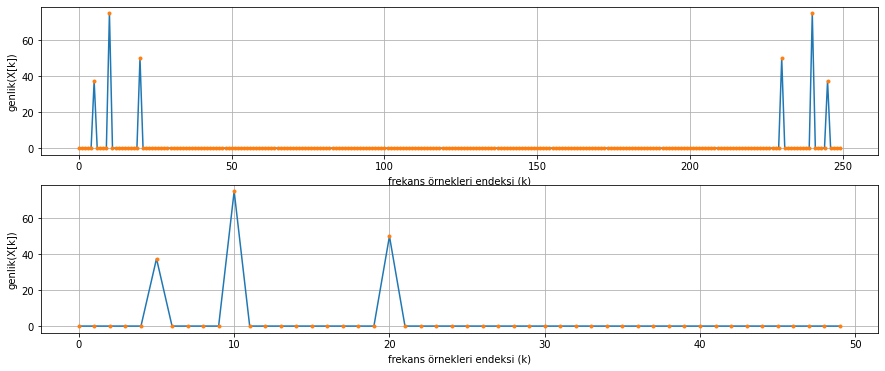

In [ ]:
fft_N = x.size
X_F = np.fft.fft(x, fft_N)
genlik_spek = np.abs(X_F)
faz_spek = np.angle(X_F)

fig = plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)   
plt.plot(genlik_spek);
plt.plot(genlik_spek ,'.');
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);
plt.subplot(2, 1, 2)
plt.plot(genlik_spek[:50]);
plt.plot(genlik_spek[:50], '.');
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);

esik_deger = 25 # bu örneğe özel gözlemle seçildi
tepe_yerleri = tepe_noktalarini_bul(genlik_spek[:fft_N//2], esik_deger)
print('Tepe noktaları endeksleri:', tepe_yerleri)
print('Tepe noktalarına karşılık gelen frekans değerleri', tepe_yerleri * ornekleme_fr / fft_N, 'Hz')

Şekil 4.6: Genlik spektrumu (fft_N = sinyaldeki örnek sayısı)

Zaman uzayındaki örnek sayısı kadar örneği frekans uzayında kullanmak yeterli oldu. İlginç bir şekilde bu çizimlerde sadece 3 (3 adet $\delta[w-w_k]$) bileşen gözledik, diğer frekanslarda bileşen gözlemedik. 

**Yukarıdaki örnek şu açılardan özel bir durumu yansıtmaktadır:** 
*   Sinyalimizin temel titreşim periyodu bir tamsayı idi (T0 = 50)
*   Sinyal uzunluğu olarak bu periyodun tam katı bir uzunluk kullandık (N = 250)
*   Frekans uzayında zaman uzayındaki ile aynı sayıda örnek kullandık

Bu özel durumda spektrumda pencereleme etkisini gözlemlemeyip sadece sinüzoidal bileşenlerimizin bulunduğunu gözlüyoruz. Bu gözlemi iki şekilde açıklayabiliriz:

*   Pencere (sinc) fonksiyonunun yan tepeleri örnekler arasına denk geliyor, sıfır değerini aldığı yerler de örneklerin bulunduğu yerlere 
*   Ayrık zaman uzayımızdaki sinyal de periyodik (sağında ve solunda sonsuz kopyası var ancak biz bir kopyayı çizdiriyoruz). Uzunluk periyodun tam katı olduğu için tekrar sınırlarında kesiklilik yok ve bu sonsuz uzunlukta sinüzoidallerin varolması demek. Bu da spektrumda dürtü bileşenleri görmemizi sağlıyor.
 
Sinyalimizin sağında ve solunda (teorik olarak) varolan ama daha önce çizdirmediğimiz kopyalarla beraber çizdirelim. Bu kopyalardan sonsuz tane sağda sonsuz tane solda var. Alttaki çizimde bu kopyaları görselleştiriyoruz.

Text(0.5, 0, 'Zaman (saniye)')

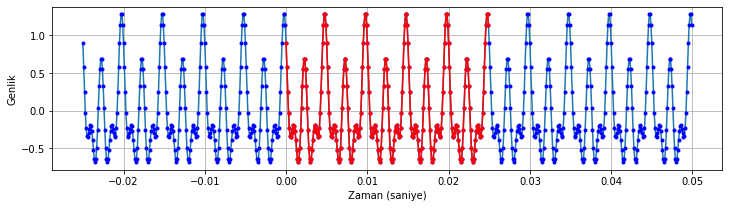

In [ ]:
t = np.arange(-x.size, x.size*2) * T
kopyalarla_x = np.concatenate((x, x, x), axis=0)
fig = plt.figure(figsize=(12, 3))
plt.plot(t, kopyalarla_x);plt.plot(t, kopyalarla_x, 'b.'); 
plt.plot(t[x.size:x.size*2], x, 'r');plt.plot(t[x.size:x.size*2], x, 'r.')
plt.grid()
plt.ylabel('Genlik')
plt.xlabel('Zaman (saniye)')

Şekil 4.7: Sentetik sinyal (kırmızı) ve çevresindeki tekrarları(mavi)

Sinyal kopya sınırlarında sürekli ve bunu sonucu olarak sinyalimiz sonsuz uzunlukta sinüzoidlerin toplamı, başka bir bileşeni yok. Bu özel durumu (sinyalin tekrarlarının tam birbirini devam ettirecek şekilde kesilmesi) bozup spektrumu tekrar gözleyelim: sinyalin baş kısmından bazı örnekleri dışarıda bırakalım (böylece kopyalar arasında bir süreksizlik oluşacaktır.)



Text(0.5, 0, 'Zaman (saniye)')

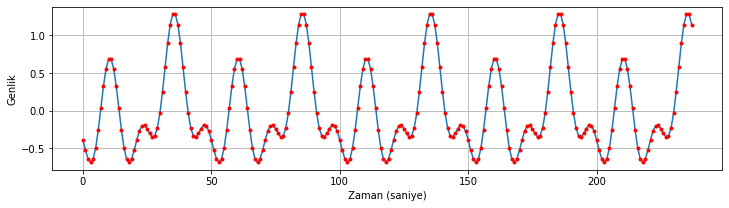

In [ ]:
x_n = x[int(T0/4):] # 5 periyotluk sinyalimizin baştaki 0.25 periyodunu dışarıda bırakalım
fig = plt.figure(figsize=(12,3))
plt.plot(x_n)
plt.plot(x_n, 'r.')
plt.grid()
plt.ylabel('Genlik')
plt.xlabel('Zaman (saniye)')

Şekil 4.8: 4.75 periyod uzunluğunda sentetik sinyal

Sinyali yandaki kopyalarla beraber çizdirelim.

Text(0.5, 0, 'Zaman (saniye)')

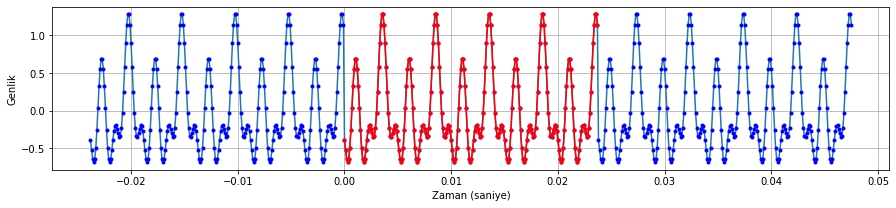

In [ ]:
t = np.arange(-x_n.size,x_n.size*2) * T
kopyalarla_x = np.concatenate((x_n, x_n, x_n), axis=0)
fig = plt.figure(figsize=(15,3))
plt.plot(t, kopyalarla_x);plt.plot(t, kopyalarla_x,'b.'); 
plt.plot(t[x_n.size:x_n.size*2], x_n, 'r');plt.plot(t[x_n.size:x_n.size*2], x_n, 'r.')
plt.grid()
plt.ylabel('Genlik')
plt.xlabel('Zaman (saniye)')

Şekil 4.9: Sentetik sinyal(kırmızı) ve çevresindeki tekrarları(mavi)

Sinyal sınırlarında kesiklilik oluştu. Sinyalimizde bu kesiklilik sebebiyle ek bileşenler gözleyeceğimizi öngörebiliriz. Spektrumu inceleyelim ve ek bileşenler var mı kontrol edelim. Frekans uzayını yine zamandaki örnek sayısı kadar örnek ile temsil edelim.

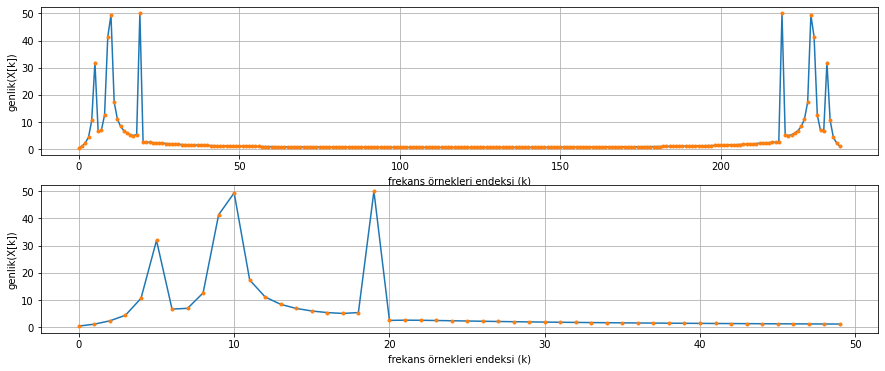

In [ ]:
X_F = np.fft.fft(x_n, x_n.size)
genlik_spek = np.abs(X_F)
faz_spek = np.angle(X_F)

fig = plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)   
plt.plot(genlik_spek);
plt.plot(genlik_spek,'.');
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);
plt.subplot(2, 1, 2)
plt.plot(genlik_spek[:50]);
plt.plot(genlik_spek[:50],'.');
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);

Şekil 4.10: Genlik spektrumu (fft_N = sinyaldeki örnek sayısı)

### Sinyalin pencere fonksiyonu ile çarpılması işleminin spektruma etkisi

Sinyalin küçük bir kısmını (baş kısımdan 20'de birini) kestik ve spektrumda yeni bileşenler gözledik. Harmoniklerin çevresindeki yeni bileşenlere ek olarak çok büyük genlikte olmasa da spektrumun geneline yayılan ek bileşenler mevcut. Bunun sebebinin kopyalar arasında kesiklilik olduğunu belirtmiştik. Bu kesikliliği azaltmak için sinyalimizi bir pencere fonksiyonu ile çarpalım ve spektrumdaki değişikliği gözleyelim. 

Text(0.5, 0, 'Zaman (saniye)')

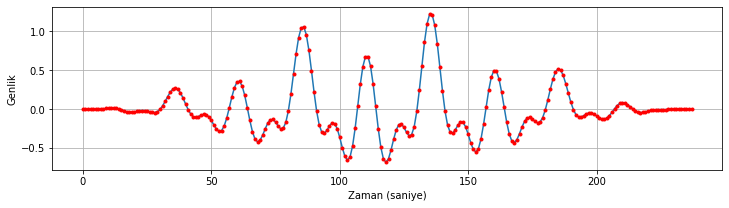

In [ ]:
from scipy import signal
x_n_w = x_n * signal.windows.hann(x_n.size)
fig = plt.figure(figsize=(12, 3))
plt.plot(x_n_w)
plt.plot(x_n_w, 'r.')
plt.grid()
plt.ylabel('Genlik')
plt.xlabel('Zaman (saniye)')

Şekil 4.11: Hanning fonksiyonu ile pencerelenmiş sentetik sinyal

Görsel inceleme için sinyali yine kopyalarıyla beraber çizdirelim

Text(0.5, 0, 'Zaman (saniye)')

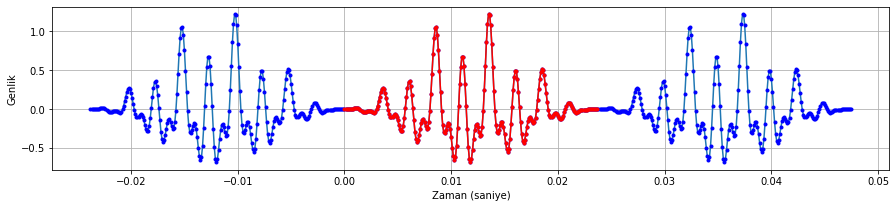

In [ ]:
t = np.arange(-x_n.size,x_n.size*2)*T
kopyalarla_x = np.concatenate((x_n_w, x_n_w, x_n_w), axis=0)
fig = plt.figure(figsize=(15,3))
plt.plot(t, kopyalarla_x);plt.plot(t, kopyalarla_x,'b.'); 
plt.plot(t[x_n_w.size:x_n_w.size*2], x_n_w, 'r');plt.plot(t[x_n_w.size:x_n_w.size*2], x_n_w, 'r.')
plt.grid()
plt.ylabel('Genlik')
plt.xlabel('Zaman (saniye)')

Şekil 4.11: Pencerelenmiş sentetik sinyal(kırmızı) ve çevresindeki tekrarları(mavi)

Kopyaların birleşim yerinde kesiklilik ortadan kalktı. Spektrumu inceleyelim. 

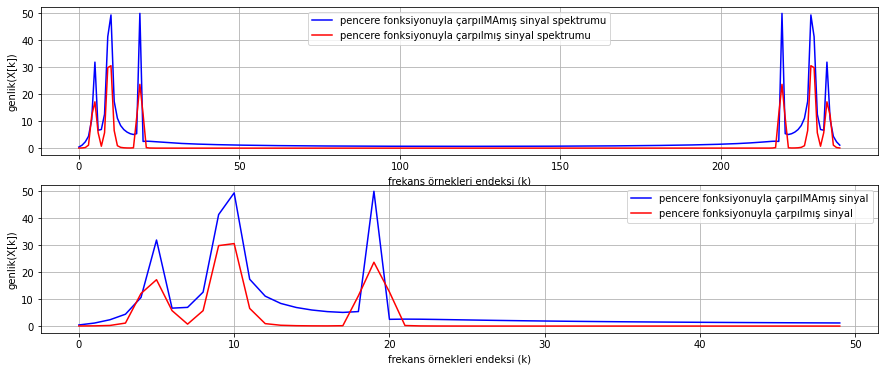

In [ ]:
X_w_F = np.fft.fft(x_n_w, x_n_w.size)
genlik_spek_w = np.abs(X_w_F)
faz_spek_w = np.angle(X_w_F)
dusuk_frekans_bant_siniri_k = 50

fig = plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)   
plt.plot(genlik_spek, 'b', label='pencere fonksiyonuyla çarpılMAmış sinyal spektrumu');
plt.plot(genlik_spek_w, 'r', label='pencere fonksiyonuyla çarpılmış sinyal spektrumu');
plt.legend()
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);
plt.subplot(2, 1, 2)
plt.plot(genlik_spek[:dusuk_frekans_bant_siniri_k], 'b', label='pencere fonksiyonuyla çarpılMAmış sinyal');
plt.plot(genlik_spek_w[:dusuk_frekans_bant_siniri_k], 'r', label='pencere fonksiyonuyla çarpılmış sinyal');
plt.legend()
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);

Şekil 4.10: Genlik spektrumu (fft_N = sinyaldeki örnek sayısı). Hanning fonksiyonu ile çarpılmış ve çarpılmamış sinyal spektrumları üstüste gösterilmektedir

Tam periyod uzunluğunda olmayan sinyalimizin pencere fonksiyonuyla çarpılmamış halinin spektrumunda çarpılmış olanına göre daha fazla yüksek frekans bileşeni gözlemekteyiz. Pencere fonksiyonu ile çarpma kopyalar arasındaki kesiklilik etkisini azalttı. Tam gidermedi çünkü kopyalarıyla beraber düşündüğümüzde sinozoidlerin periyodikliği dışında sinyalin kopyalarıyla başka periyodik bileşenlerimiz oluştu. 



Bu örnekte bir sinyalin bir kesitini alıp spektrumunu incelediğimizde şu seçimlerimizin önemli olduğunu gördük: i) sinyalin nasıl kesildiği, ii) pencere fonksiyonu ile çarpma işlemi, iii) fft işlemi için tercih edilen nokta sayısı

Vurgulamak istediğimiz bir nokta: sinyali kestiğimizde de (bir pencere fonksiyonuyla çarpmadığımızda da) aslında 'kutu'(İng: rectangular) pencere ile çarpmış olduğumuzdur. Gördüğümüz gibi elde ettiğimiz spektrum pencereleme işleminden etkileniyor ve kutu pencere kullanıldığında spektrumun geneline (yüksek frekanslara kadar) yayılan ek bileşenler görüyoruz. Bu etkiyi Fourier Dönüşümünün şu özelliğini kullanarak açıklayabiliriz: iki sinyalin zamanda çarpılması frekans uzayında evrişim (konvolüsyon) işlemine tabi tutulmasına karşılık gelir. $w[n]$ pencere sinyali olmak üzere zamanda (eleman elemana) çarpma işlemi:

$$x_w[n] = x[n] * w[n]$$

frekans uzayında iki sinyalin konvolüsyona tabi tutulmasına karşılık gelir:

$$x_w(e^{jw}) = X(e^{jw}) \circledast W(e^{jw})$$

Demek ki sinyalimizin gözlediğimiz spektrumu, pencere spektrumu ile konvolüsyona tabi olmuş durumda. Bu, daha önce neden sinc fonksiyonu gözlediğimizi de açıklıyor: harmonik frekanslarında pencere fonksiyonunun spektrumunun kopyalarını gözlüyorduk. (Daha detaylı bir açıklama için [bakınız](https://download.ni.com/evaluation/pxi/Understanding%20FFTs%20and%20Windowing.pdf))

Doğadan toplayıp analiz ettiğimiz bir sinyali düşünür iseniz, çoğu durumda yukarıdaki gibi kopyalar arasında süreksizlik olacağını öngörebilirsiniz. Buna ek olarak sadece 3 bileşen değil, çok sayıda bileşen bulunacaktır. 

### Pencereleme fonksiyon seçiminin spektruma etkisi


Öncelikle şunu tekrar vurgulamalıyız: sınırlı zaman sinyallerini işlediğimiz için her koşulda bir pencereleme işlemi gerçekleştirmiş oluyoruz. Bir pencere fonksiyonu ile çarpmadığımızda kutu('boxcar') pencere kullanmış oluyoruz. Bu, kutu pencere spektrumu olan sinc fonksiyonunun sinyalimizin spektrumu ile konvolüsyona tabi tutulmasına karşılık geliyor. Gözlediğimiz spektrum bu etkiyi içeriyor.

Pencere fonksiyonlarının spektruma etkisi için [şu Wikipedia sayfasını](https://en.wikipedia.org/wiki/Window_function) inceleyebilirsiniz.

Birkaç popüler pencere fonksiyonunu ve spektrumlarını çizdirerek inceleyelim. 

In [ ]:
# Defterin geri kalanında çok kere genlik spektrumu çizdireceğimiz için 
# bir fonksiyon tanımlayıp kullanalım
def genlik_spektrumu(x, fft_N):
  '''Verilen x sinyalinin dB skalasında genlik spektrumunu
  hesaplar ve spektrumun ilk yarısını([0, örnekleme-frekansı/2] aralığını) 
  döndürür

  Parametreler
  ----------
  x : numpy.array
      Giriş sinyali
  fftN : int
      Spektrum hesabında kullanılan nokta sayısı

  Döndürülenler
  -------
  numpy.array
      Genlik spektrumu (pozitif frekans bölgesi)
  '''
  X = np.fft.fft(x, fft_N)
  genlikX = np.abs(X[:int(fft_N / 2)])
  genlikX[genlikX < np.finfo(float).eps] = np.finfo(float).eps # log operasyonundan önce önlem
  return 20 * np.log10(genlikX)

Aynı uzunluktaki beş farklı pencere fonksiyonunun spektrumunu çizdirelim.

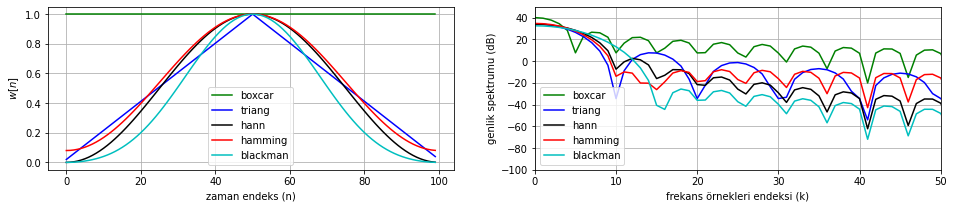

In [ ]:
from scipy import signal
N = 100
fft_N = 512
pencereler = ['boxcar', 'triang', 'hann', 'hamming', 'blackman']
renkler = ['g', 'b', 'k', 'r', 'c']


fig = plt.figure(figsize=(16,3))
plt.subplot(1,2,1) 
for i, pencere in enumerate(pencereler):
  pencere_fonksiyonu = signal.get_window(pencere, N)
  plt.plot(pencere_fonksiyonu, renkler[i], label = pencere)
plt.grid()
plt.legend();
plt.xlabel('zaman endeks (n)')
plt.ylabel('$w[n]$')

plt.subplot(1,2,2) 
for i, pencere in enumerate(pencereler):
  pencere_fr = genlik_spektrumu(signal.get_window(pencere, N), fft_N)
  plt.plot(pencere_fr, renkler[i], label = pencere)
plt.grid();
plt.xlim(0, 50)
plt.ylim(-100, 50)
plt.legend();
plt.xlabel('frekans örnekleri endeksi (k)');
plt.ylabel('genlik spektrumu (dB)');

Şekil 4.11: Pencere fonksiyonları ve genlik spektrumları

Şimdi elimizdeki sinyalin spektrumunun pencereleme fonksiyonu tercihine bağlı olarak nasıl değiştiğine bakalım

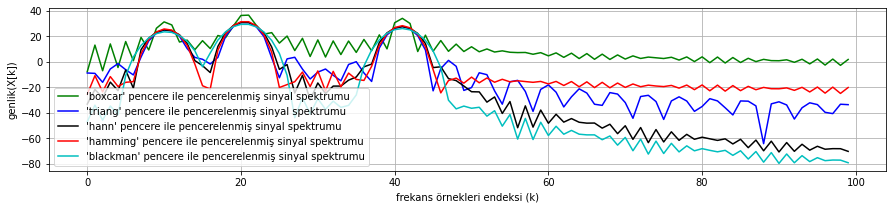

In [ ]:
dusuk_frekans_bant_siniri_k = 100 # yakınlaştırmak için ilk 100 spektrum örneğini çizdirelim 

fig = plt.figure(figsize=(15,3))
for i, pencere in enumerate(pencereler):
  sinyal_spektrum_w = genlik_spektrumu(x_n * signal.get_window(pencere, x_n.size), fft_N)
  plt.plot(sinyal_spektrum_w[:dusuk_frekans_bant_siniri_k], renkler[i], label = "'"+pencere + "'" + ' pencere ile pencerelenmiş sinyal spektrumu')

plt.legend()
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k)')
plt.grid(True);

Şekil 4.12: Pencere fonksiyonu ile çarpılmış sentetik sinyalin spektrumu (çeşitli fonksiyonlar için sonuçlar üstüste gösterilmektedir)

Gördüğümüz gibi spektrumda harmoniklerin bulunduğu yerlerde birer ana lob bulunmakta ve diğer bölgelerde farklı düzeylerde bileşenler gözlemekteyiz. Örnek bir ses sinyali parçası için spektrumu inceleyelim. 

In [ ]:
#Ses dosyasını okumak için kütüphane yükleyelim
import soundfile as sf
import urllib.request
from IPython.display import Audio

In [ ]:
url = 'https://github.com/barisbozkurt/dataDumpForCourses/raw/master/exampleSpeech.wav'
urllib.request.urlretrieve(url,'exampleSpeech.wav')
konusma_sinyali, ornekleme_fr = sf.read('exampleSpeech.wav')

fft_N = ornekleme_fr # Frekans uzayında örnekleme frekansı kadar nokta kullanalım (her bir nokta 1 Hz'e karşılık gelsin)
dusuk_frekans_bant_siniri_k = 8000 # Spektrumun 0-8000Hz bandını çizdirelim

#sinyal içerisinde 'a' sesinin olduğu küçük bir bölgeyi kullanalım
a_basla_endeks = 25500
a_bitir_endeks = 27500
x_n = konusma_sinyali[a_basla_endeks:a_bitir_endeks]
Audio(x_n, rate=ornekleme_fr)

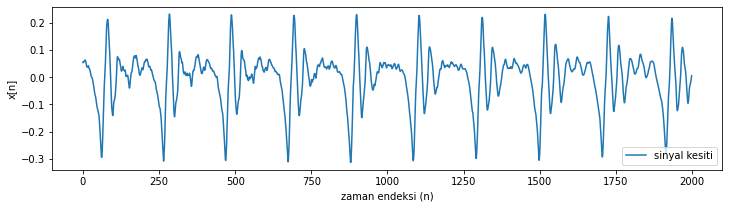

In [ ]:
#Alınan sinyal kesitinin çizdirilmesi
plt.figure(figsize=(12,3))
plt.plot(x_n, label='sinyal kesiti')
plt.xlabel('zaman endeksi (n)');plt.legend();
plt.ylabel('x[n]');

Şekil 4.13: Gerçek sinyal kesiti

Bu sinyali farklı pencere fonksiyonları ile çarpıp genlik spektrumlarını karşılaştıralım

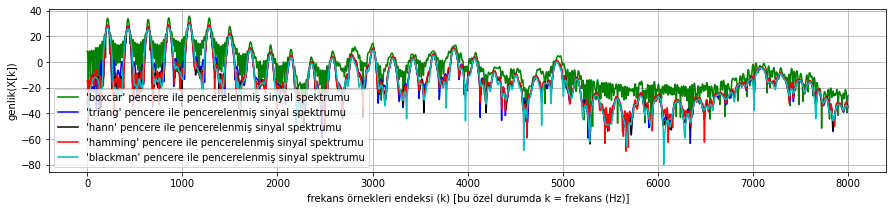

In [ ]:
# Farklı pencere fonksiyonları ile çarpılıp daha sonra hesaplanan spektrumların çizidirilmesi
fig = plt.figure(figsize=(15,3))
for i, pencere in enumerate(pencereler):
  sinyal_spektrum_w = genlik_spektrumu(x_n * signal.get_window(pencere, x_n.size), fft_N)
  plt.plot(sinyal_spektrum_w[:dusuk_frekans_bant_siniri_k], renkler[i], label = "'"+pencere + "'" + ' pencere ile pencerelenmiş sinyal spektrumu')

plt.legend()
plt.ylabel('genlik(X[k])')
plt.xlabel('frekans örnekleri endeksi (k) [bu özel durumda k = frekans (Hz)]')
plt.grid(True);


Şekil 4.14: Pencere fonksiyonu ile çarpılmış gerçek sinyalin spektrumu (çeşitli fonksiyonlar için sonuçlar üstüste gösterilmektedir)

Gerçek bir sinyal üzerinden ele aldığımız bu örnekte de yine harmoniklerde ana loblar görebiliyoruz. Buna ek olarak gözlenen bileşenler de mevcut. Kutu pencerenin  kullanıldığı durumda (sinyali bir pencere fonksiyonu ile çarpmadığımızda) ara bileşenlerin enerjilerinin yüksek olduğunu gözlüyoruz. 

### Periyodik bir sinyalin genlik spektrumu

Buraya kadar frekans uzayında kullanılan örnek sayısı ve sinyali çarptığımız pencere fonksiyonunun etkilerini inceledik. Şimdi sinyalin üretim sürecini de ele alarak perspektifimizi genişletelim.  Sinyalimizin nedensel bir sistemin uyarılmasıyla oluştuğunu düşünelim.

<img src="https://github.com/ses-isleme/ses-isleme.github.io/raw/main/static/img/spektrum_1.png" width=500 height=120 > 

Sistem bir $\delta(t)$ ile uyarıldığında $h(t)$ dürtü cevabını oluşturacak. $h(t)$'nin Fourier dönüşümü bize sistemin frekans cevabını verecektir. En sağda gösterilen genlik spektrumunu elde ettiğimizi düşünelim. 

Sistem periyodik dürtü katarı ile uyarıldığında periyodik bir sinyal oluşturacaktır. 

<img src="https://github.com/ses-isleme/ses-isleme.github.io/raw/main/static/img/spektrum_2.png" width=650 height=275 />  

Dürtü katarının sonsuz uzunlukta olduğunu varsayarsak, zamanda gerçekleştirilen konvolüsyon işlemi:

$$
s(t) = h(t) \circledast \sum_{k = -\infty}^{\infty} \delta(t-kT0)
$$

frekans uzayında iki sinyalin çarpılmasına karşılık gelecektir:


$$
FT(s(t)) = FT(h(t)) * FT(\sum_{k = -\infty}^{\infty} \delta(t-kT0))
$$

$FT(h(t))$'yi üstte çizmiştik. Dürtü katarının Fourier dönüşümü bize frekans uzayında bir dürtü katarı verecektir ([bakınız](https://class.ece.uw.edu/235dl/EE235/Project/lesson19/lesson19.html)).

$$
FT(\sum_{k = -\infty}^{\infty} \delta(t-kT0)) = \sum_{k = -\infty}^{\infty} w_0 \delta(w-kw_0)
$$

Çarpma işlemi sonucunda sağda gösterilen $|S(w)|$'yı elde ederiz. $|S(w)|$, sonsuz uzunluktaki periyodik bir sinyalin genlik spektrumunu temsil etmektedir. Dürtü katarı harmonikler oluşmasına yol açtı, sistemin etkisi ise spektrumun zarfında (İng: envelope) gözleniyor. 

Programlama ile sinyal işleme yaparken sonsuz uzunlukta sinyallerle çalışamadığımız için mecburen sinyalimizi pencereleyeceğiz. Bu da daha önce açıkladığımız gibi spektrumda pencere sinyalinin spektrumu ile bir konvolüsyon yapılmasına karşılık gelecek. Sonuçta aşağıda gösterdiğimiz $|S_w(w)|$'yı elde edeceğiz.

<img src="https://github.com/ses-isleme/ses-isleme.github.io/raw/main/static/img/spektrum_3.png" width=500 height=250 > 


Gerçekten de bir gerçek periyodik sinyal kaydının bir kısmının genlik spektrumu çizdiriseniz benzer bir sonuç gözleyeceksiniz. Yukarıda konuşma sinyalinden aldığımız örneğin spektrumunu tekrar inceleyiniz. Bileşenleri şu şekilde özetleyebiliriz:

*   Spektrumun zarfı üreten sistemin spektrumundan geldi
*   Harmonikler sistemi uyaran dürtü katarı sebeiyle oluştu (dürtü katarının temel titreşim frekansı sinyalinde de temel titreşim frekansını belirledi).
*   Sinyali mecburen zamanda sınırlandırdığımız için pencerelee uygulamış ve bunun sonucu olarak spektrumu pencere spektrumu ile konvolüsyona tabi tutmuş olduk. Bunun sonucu olarak her harmonikte sinc fonksiyonuna benzer bir fonksiyonun kopyasını gözledik.

## Kısa Süreli Fourier Dönüşümü (STFT)

Buraya kadar sinyalin küçük bir kesitinin spektrumunun hangi bileşenleri içerdiğini ele almış olduk. Küçük bir kesit içerisinde sinyalin durağan olduğunu varsayabiliriz. Kesit, genişledikçe zamanla değişen bir sinyal içerecektir ve bu spektrumdaki bileşenlerin sinyalin hangi kısmından kaynaklandığını anlamamızı zorlaştıracaktır. Yüklediğimiz konuşma sinyalini tek kesit olarak çizdirip inceleyelim.

Text(0, 0.5, 'x[n]')

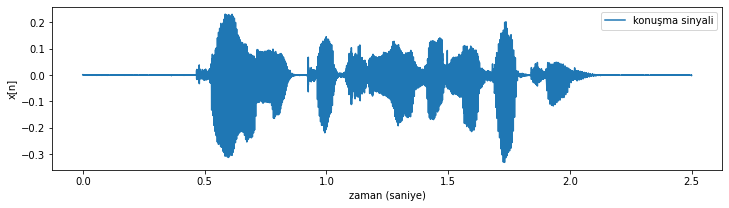

In [ ]:
# Konuşma sinyalinin çizdirilmesi
plt.figure(figsize=(12,3))
t = np.arange(0,konusma_sinyali.size/ornekleme_fr, 1/ornekleme_fr)
plt.plot(t,konusma_sinyali, label='konuşma sinyali')
plt.xlabel('zaman (saniye)');plt.legend()
plt.ylabel('x[n]')

Şekil 4:14: Konuşma sinyali örneği

In [ ]:
Audio(konusma_sinyali, rate=ornekleme_fr)

Sinyalin zamanla değişiyor olması sebebiyle sinyalin bütününün genlik spektrumunu incelemek bize sınırlı bilgi sunacaktır. Bütün bir sinyalin spektrumunu incelemek istediğimizde en yaygın kullanılan araç Kısa Süreli Fourier Dönüşümü([Short-Time Fourier Transform, STFT](https://en.wikipedia.org/wiki/Short-time_Fourier_transform))'dür. Kısa Süreli Fourier Dönüşümü sinyalin bütünü yerine küçük kesitleri üzerinden Fourier Dönüşümü hesaplanmasına karşılık gelir. Bu şekilde elde edilen spektrumlar yanyana dizilip genlik bilgisi renk koduna eşlendiğinde [spektrogram](https://en.wikipedia.org/wiki/Spectrogram) adı verilen bir zaman-frekans gösterimi/görüntüsü elde edilmiş olur. 



<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/ba7a721b6f51bd85e177663e30decf885862d160" width=500 />




| <img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780123744906000076-f07-7-01-9780123744906.jpg" width=500 /> |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------: |
| Şekil 4.15: _Kısa süreli Fourier dönüşümü hesaplama_|


Analizini yaptığımız birçok sinyal "kısmi durağan" (quasi-stationary) kategorisindedir. Kısmi durağan sinyallerin temel karekteristiği: sinyalin küçük kesitlerini aldığınızda kesit içindeki sinyal durağandır (tekrar eden benzer karakteristikte periyotlar içerir) ancak pencereden pencereye, zaman içerisinde, karakteristik değişir. 

Alınan her kesit, spektrum hesabı öncesinde, pencere fonksiyonuyla çarpılır (çarpılmadığı durumda yukarıdaki örneklerde görüldüğü gibi kutu pencereleme kullanılmaktadır ve bundan kaynaklı olarak ek bileşenlerin enerjilerinin yüksek olduğu gözlenir). Pencerenin şu özellikleri spektrogramı etkiler:

*   Pencerelerin/kesitlerin uzunluğu (kullanılan örnek sayısı)
*   Pencere fonksiyonu (hanning, hamming, vb.)
*   Pencerelerin sinyaldeki özel anlarla senkronizasyonu (bu genlik spektrumundan çok faz spektrumunu etkiler)

Bu etkileri teker teker ele alalım.


### Pencere uzunluğunun spektrograma etkisi


Spektrogram çizdirmek için bir fonksiyon tanımlayalım ve farklı pencere uzunlukları kullanarak elimizdeki sinyalin spektrogramını çizdirelim. Yazdığımız fonksiyon sinyalle beraber şu **analiz parametreleri**ni alacak:


*   **Pencere genişliği (İng: window size):** her bir penceredeki örnek sayısı
*   **Pencere kaydırma miktarı (İng: hop size):** bir pencere ile bir sonraki arasında örnek sayısı açısından fark. Bu değerin pencere genişliğinden düşük olduğu durumda pencereler üstüste binecektir. Spektrogramın yavaş değişen bir karakteristiğinin olması tercih edilen bir durumdur, bu sebeple çoğunlukla üstüste binen pencereler tercih edilir. Birçok uygulamada üstüste binme oranı %50 olarak kullanılır ( Pencere kaydırma miktarı = Pencere genişliği / 2). 
*   **fft_N**: Fourier dönüşüm hesaplarken kullanılacak nokta sayısı

Bunlara ek olarak, çizimlerde belirli bölgeleri göstermek için her bir eksende hangi aralığın görselleştirileceğini belirtir sınırları taşıyan bir değişken(eksen_limitleri) kullanılmıştır. 



In [ ]:
# Sinyalin küçük kesitlerinin spektrumlarını genlik_spektrumu() fonksiyonu ile hesaplayıp 
# yanyana dizerek zaman-frekans gösterimi oluşturan spektrogram fonksiyonumuzu yazalım
def spektrogram_cizdir(x, pencereFonksiyonAdi, pencereGenisligi, pencereKaydirmaMiktari, fftN, ornekleme_fr, eksen_limitleri={}):
  pencere_fonksiyonu = signal.get_window(pencereFonksiyonAdi, pencereGenisligi)

  # Pencerelerin baslangic noktalarını hesaplayalım
  pencere_baslangiclari = np.arange(0, x.size - pencereGenisligi, pencereKaydirmaMiktari, dtype = int)
  pencereSayisi = pencere_baslangiclari.size

  spktrgrm = np.array([]).reshape(0, int(fftN / 2)) # spektogram boş bir dizi olarak başlatılıyor
  for k in range(pencereSayisi):
      pencere_baslangici = pencere_baslangiclari[k]
      x_win = x[pencere_baslangici:pencere_baslangici + pencereGenisligi] * pencere_fonksiyonu
      spktrgrm = np.vstack((spktrgrm, genlik_spektrumu(x_win, fftN))) # k. sinyal kesitinin spektrumunun eklenmesi


  # Spektrogram matrisinin çizdirilmesi
  zamanEkseni = np.arange(spktrgrm.shape[0]) * pencereKaydirmaMiktari / float(ornekleme_fr)
  frekansEkseniHz = np.arange(spktrgrm.shape[1]) * float(ornekleme_fr) / float(fftN)

  fig = plt.figure(figsize=(15,4))
  plt.pcolormesh(zamanEkseni, frekansEkseniHz, np.transpose(spktrgrm))
  plt.xlim([0, zamanEkseni[-1]])
  plt.ylim([0, frekansEkseniHz[-1]])
  plt.title('Genlik Spektrogramı (dB)')
  plt.ylabel('frekans(Hz)')
  plt.xlabel('zaman(saniye)')
  if 'x' in eksen_limitleri:
    plt.xlim(eksen_limitleri['x'])
  if 'y' in eksen_limitleri:
    plt.ylim(eksen_limitleri['y'])
  plt.show()

#### Geniş bant spektrogramı

Zaman-frekans gösterim hesaplamalarında her iki eksende birden çözünürlüğü artıramayız. Bu, fizikteki belirsizlik ilkesine benzer bir durum olduğu için [sinyal analizinde belirsizlik prensibi](https://cnx.org/contents/EjCyVd57@1/The-Uncertainty-Principle-in-Signal-Processing) olarak anılır. Kullandığımız kesitler/pencereler kısa olduğunda zaman uzayında çözünürlüğümüz yüksek, frekans uzayında çözünürlüğümüz düşük (her bir frekans noktamızın karşılık geldiği frekans bandı geniş) olur. Bu şekilde elde edilen spektrograma geniş bant spektrogramı adı verilir. Buradaki ilişkiyi aklınızda tutmakta zorlanır iseniz geniş bir kare dalga ve dar bir kare dalganın spektrumunu düşünebilirsiniz. Zamanda dar bir kare dalganın frekans spektrumunda ana lobu daha geniştir, bu spektrumda geniş bir banta tekabül eder. 


Alttaki örnekte pencere uzunluğu olarak 512 örnek/nokta, pencere kaydırma miktarı olarak 256 örnek/nokta seçilmiştir (pencere örtüşme oranı: %50). 

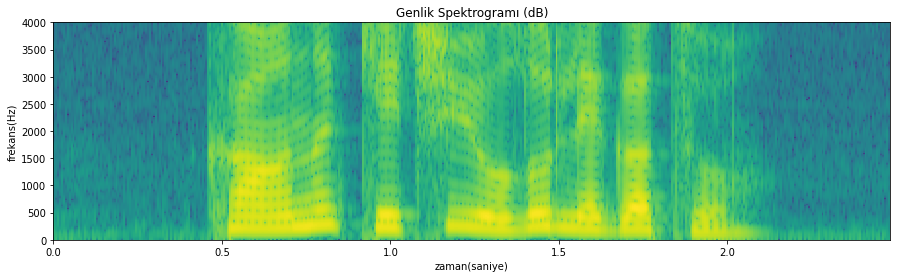

In [ ]:
eksen_limitleri = {'y':(0, 4000)}#Hz cinsinden eksen sınırları
spektrogram_cizdir(konusma_sinyali, pencereFonksiyonAdi='blackman', pencereGenisligi=512, pencereKaydirmaMiktari=256, fftN=2048, ornekleme_fr=ornekleme_fr, eksen_limitleri=eksen_limitleri)

Şekil 4.16: Geniş bant spektrogramı

#### Dar bant spektrogramı

Şimdi pencere genişliğimizi 4 katına çıkartalım. Pencere genişliği = 2048 örnek ve kaydırma miktarı = 512 örnek. Geniş bant ve dar bant kavramları göreceli kavramlardır ve sinyal karakteristiğine göre seçilen parametrelerin büyüklükleri değişecektir. Tipik olarak ortalama sinyal periyodunun iki katından düşük pencere uzunlukları geniş bant, yüksek pencere uzunlukları dar bant karakteristiği taşır. Nedir bu karakteristikler? 

Alttaki grafiği (Şekil 4.17) üstteki (Şekil 4.16) ile karşılaştırdığımızda ilk gözümüze çarpan dar bant spektrogramda gözlenen yatay çizgilerdir. Geniş bant spektrogramının daha bulanık olduğunu görüyoruz. Gördüğümüz (beraber hareket eden) yatay çizgiler harmonik tepelerine denk gelen noktaların birleşimi olup bize her bir harmoniğin frekansının zamanla nasıl değiştiğini gözlemeye fırsat sunar. Frekans ekseninde daha dar bir kesiti incelediğinizde bunu daha açık bir şekilde gözleyebilirsiniz. 

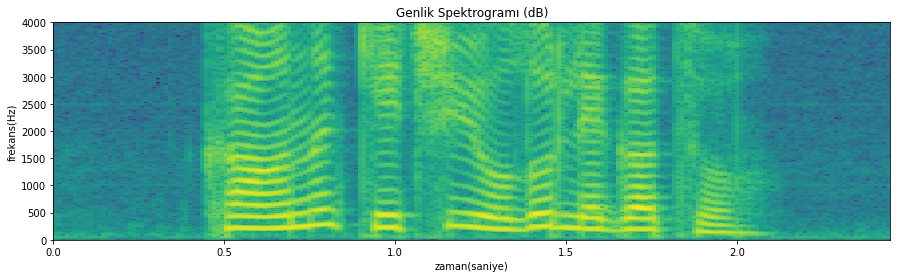

In [ ]:
eksen_limitleri = {'y':(0, 4000)}
spektrogram_cizdir(konusma_sinyali, pencereFonksiyonAdi='blackman', pencereGenisligi=2048, pencereKaydirmaMiktari=512, fftN=2048, ornekleme_fr=ornekleme_fr, eksen_limitleri=eksen_limitleri)

Şekil 4.17: Dar bant spektrogramı

Yukarıdaki spektrogramın frekans ekseninde yakınlaştırılmış halinin çizdirilmesi

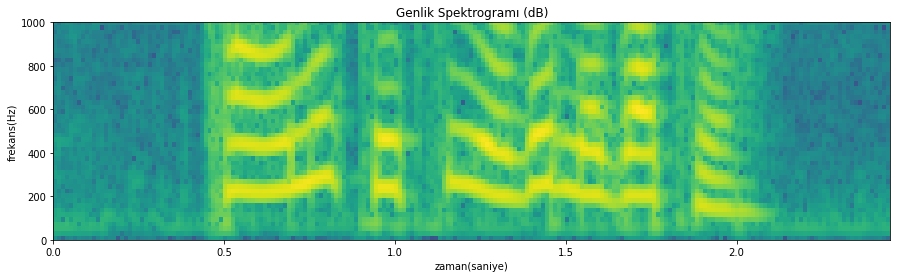

In [ ]:
eksen_limitleri = {'y':(0, 1000)}
spektrogram_cizdir(konusma_sinyali, pencereFonksiyonAdi='blackman', pencereGenisligi=2048, pencereKaydirmaMiktari=512, fftN=2048, ornekleme_fr=ornekleme_fr, eksen_limitleri=eksen_limitleri)

Şekil 4.18: Dar bant spektrogramı (yakınlaştırılmış)

Dar bant spektrogramı sinyalin temel titreşim frekansının zamanla nasıl değiştiğini gözlemek için sıkça kullanılır. 200Hz civarında gözlediğimiz yatay eğri entonasyonun (temel titretişim frekansının, ya da konuşma sinyalinin ezgisinin) zamanla değişimini temsil eden bir iz olarak düşünülebilir. Bir müzik sinyali örneğine bakalım. A4 notasını (~440Hz) icra eden bir flüt sesi kaydının spektrogramını çizdirip inceleyelim. 

In [ ]:
url = 'https://github.com/MTG/sms-tools/raw/master/sounds/flute-A4.wav'
urllib.request.urlretrieve(url,'flute-A4.wav')
muzik_sinyali, ornekleme_fr_2 = sf.read('flute-A4.wav')
Audio(muzik_sinyali, rate=ornekleme_fr_2)

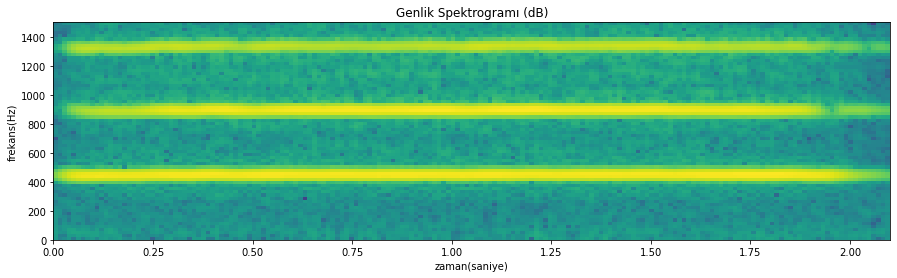

In [ ]:
eksen_limitleri = {'y':(0, 1500)}
spektrogram_cizdir(muzik_sinyali, pencereFonksiyonAdi='blackman', pencereGenisligi=2048, pencereKaydirmaMiktari=512, fftN=2048, ornekleme_fr=ornekleme_fr_2, eksen_limitleri=eksen_limitleri)

Şekil 4.19: Dar bant spektrogramı (yakınlaştırılmış, müzik sinyali örneği)

Burada ilk harmoniğin 440 Hz civarında, diğer harmoniklerin frekanslarının bu frekansın tam katlarında olduğunu görebiliyoruz. Diğer bir örnek olarak bir saksafon kaydı spektrogramını inceleyelim. 

In [ ]:
url = 'https://github.com/MTG/sms-tools/raw/master/sounds/sax-phrase-short.wav'
urllib.request.urlretrieve(url,'sax-phrase-short.wav')
muzik_sinyali, ornekleme_fr_2 = sf.read('sax-phrase-short.wav')
Audio(muzik_sinyali, rate=ornekleme_fr_2)

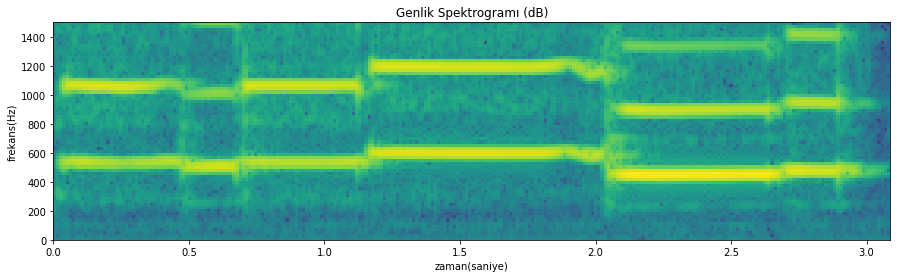

In [ ]:
eksen_limitleri = {'y':(0, 1500)}
spektrogram_cizdir(muzik_sinyali, pencereFonksiyonAdi='blackman', pencereGenisligi=2048, pencereKaydirmaMiktari=512, fftN=2048, ornekleme_fr=ornekleme_fr_2, eksen_limitleri=eksen_limitleri)

Şekil 4.20: Dar bant spektrogramı (yakınlaştırılmış, müzik sinyali örneği)

Bu örnekte 400Hz-650Hz aralığında birinci harmoniğin frekans değişimini görebiliyoruz. Bu dinlediğimiz ezginin zamanla frekans değişim grafiğidir. İkinci harmoniğin frekans değişim grafiğini hemen üstünde görebilmekteyiz. 

### Pencere fonksiyonunun spektrograma etkisi

Pencere fonksiyonunun spektrograma etkisini incelemek için biri sentetik, diğeri gerçek iki örnek sinyal ele alacağız. Şekil sayısını sınırlı tutmak için sadece Hanning ve Kutu pencere fonksiyonlarını karşılaştıracağız. Öncelikle gerçek sinyal için spektrogram oluşturalım. 

Kutu pencere kullanıldığı durumda elde edilen spektrogram


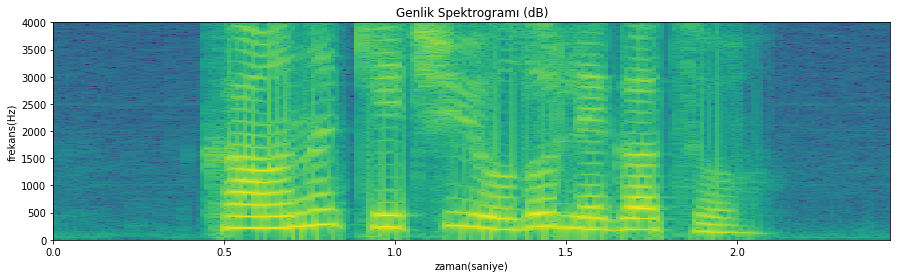

Hanning penceresi kullanıldığı durumda elde edilen spektrogram


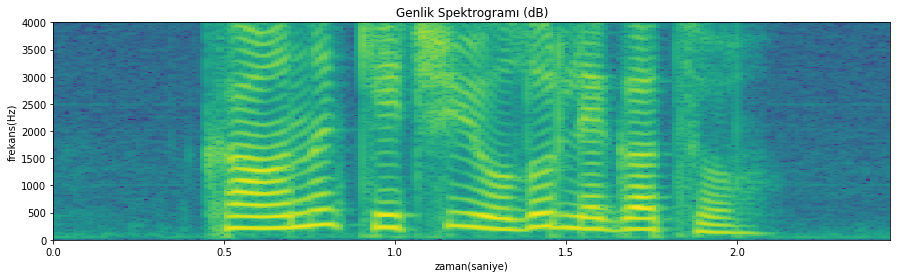

In [ ]:
#Kutu pencere kullanarak spektrogram oluşturulması
eksen_limitleri = {'y':(0, 4000)}
print('Kutu pencere kullanıldığı durumda elde edilen spektrogram')
spektrogram_cizdir(konusma_sinyali, pencereFonksiyonAdi='box', pencereGenisligi=2048, pencereKaydirmaMiktari=512, fftN=2048, ornekleme_fr=ornekleme_fr, eksen_limitleri=eksen_limitleri)

#Hanning pencere kullanarak spektrogram oluşturulması
print('Hanning penceresi kullanıldığı durumda elde edilen spektrogram')
spektrogram_cizdir(konusma_sinyali, pencereFonksiyonAdi='hann', pencereGenisligi=2048, pencereKaydirmaMiktari=512, fftN=2048, ornekleme_fr=ornekleme_fr, eksen_limitleri=eksen_limitleri)


Şekil 4.21: Pencere fonksiyonunun spektruma etkisi: kutu pencere ve Hanning penceresi karşılaştırma (konuşma sinyali örneği)

Spektrogramlar üzerinde görsel inceleme yapmaya aşina değilseniz, farklar açık olmayabilir. Alttaki spektrogramın üsttekinden daha 'temiz' göründüğünü söyleyebiliriz. Bununla beraber üstteki spektrogramda harmonik çizgileri daha ince ve keskin görünüyor.

Genellikle spektrogramlarda belirli bileşenleri görmek ve bazı bileşenlerden kaçınmak isteriz. Bu hedef yönünde seçeneklerimizi optimize etmeye çalışırız. Genellikle, pencere spektrumundan gelen ek bileşenlerden kaçınmak ve sinyal spektrumunda birbirine yakın frekanslarda yakından bulunan bileşenlerin ayrılabilir olmasını tercih ederiz. Ancak bu kriterlerin ikisini birarada optimize edemeyiz.

Bu iki boyutu ele almak için bir de sentetik sinyal örneği kullanalım. Sinyalimizde frekansı azalan ve artan birer bileşen ([chirp sinyali](https://en.wikipedia.org/wiki/Chirp#:~:text=A%20chirp%20is%20a%20signal,as%20in%20spread%2Dspectrum%20communications.)) kullanacağız. Bu iki bileşenin frekansının birbirine yakın ve uzak olduğu bölgeler olmasını sağlayacak ve bu bölgelerde spektrogramları inceleyerek yukarıdaki kriterleri ele alabileceğiz. 

In [ ]:
sure_saniye = 2.0
orn_fr_sentetik = 10000
N = int(sure_saniye * orn_fr_sentetik)
t = np.arange(0, N) / orn_fr_sentetik
z = np.sin(np.pi * 400 * t * t)
z_ters = z[::-1]

z_mix = z + z_ters

Audio(z_mix, rate=orn_fr_sentetik)

Kutu pencere kullanıldığı durumda elde edilen spektrogram


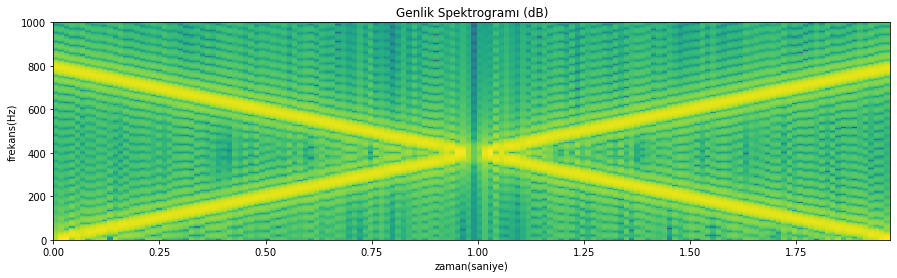

Hanning penceresi kullanıldığı durumda elde edilen spektrogram


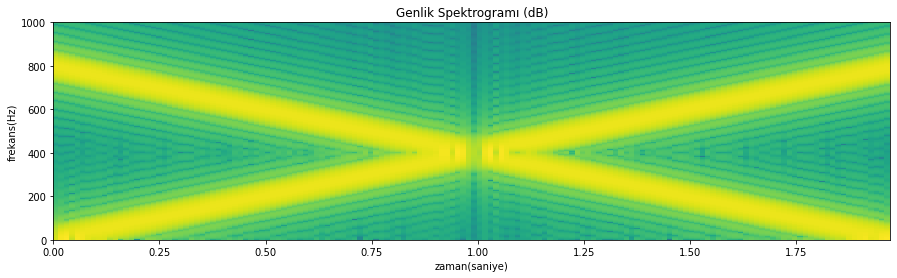

In [ ]:
eksen_limitleri = {'y':(0, 1000)}
print('Kutu pencere kullanıldığı durumda elde edilen spektrogram')
spektrogram_cizdir(z_mix, pencereFonksiyonAdi='box', pencereGenisligi=256, pencereKaydirmaMiktari=128, fftN=2048, ornekleme_fr=orn_fr_sentetik, eksen_limitleri=eksen_limitleri)

print('Hanning penceresi kullanıldığı durumda elde edilen spektrogram')
spektrogram_cizdir(z_mix, pencereFonksiyonAdi='hann', pencereGenisligi=256, pencereKaydirmaMiktari=128, fftN=2048, ornekleme_fr=orn_fr_sentetik, eksen_limitleri=eksen_limitleri)

Şekil 4.22: Pencere fonksiyonunun spektruma etkisi: kutu pencere ve Hanning penceresi karşılaştırma (sentetik sinyal örneği)

Bu iki grafiği karşılaştırdığımızda, Hanning penceresi kullanılarak elde edilen spektrogramda frekans düzleminde yakından bulunan bileşenlerin daha düşük ayrılabilir olduğu ancak spektrogramın daha temiz olduğunu görebiliyoruz. Bunun kaynağı Hanning penceresinin ana lobunun geniş olması ve yan loblarının enerjisinin daha düşük olmasıdır. Hatırlayalım, zamanda pencere fonksiyonu ile çarpma yaptığımız için gözlediğimiz spektrum pencere fonksiyon spektrumu ile konvolüsyon yapılmış bir spektrum. Ana lob ve yan lobların etkisi bu konvolüsyon işlemi sonucu yukarıda açıklanan etkileri oluşturuyor. 

Text(0, 0.5, 'genlik spektrumu (dB)')

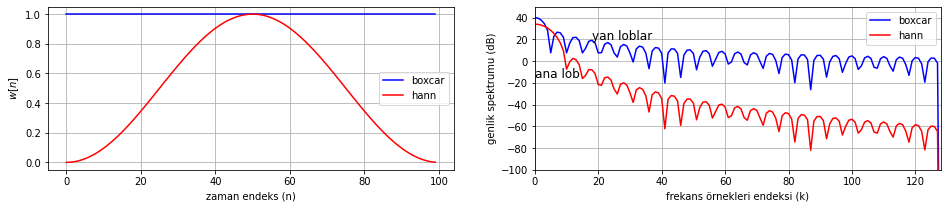

In [ ]:
N = 100
fft_N = 512
pencereler = ['boxcar', 'hann']
renkler = ['b', 'r']

fig = plt.figure(figsize=(16,3))
plt.subplot(1,2,1) 
for i, pencere in enumerate(pencereler):
  pencere_fonksiyonu = signal.get_window(pencere, N)
  plt.plot(pencere_fonksiyonu, renkler[i], label = pencere)
plt.grid()
plt.legend();
plt.xlabel('zaman endeks (n)')
plt.ylabel('$w[n]$')

plt.subplot(1,2,2) 
for i, pencere in enumerate(pencereler):
  pencere_fr = genlik_spektrumu(signal.get_window(pencere, N), fft_N)
  plt.plot(pencere_fr, renkler[i], label = pencere)
plt.grid();
plt.xlim(0, fft_N/4)
plt.ylim(-100, 50)
plt.text(0, -15, 'ana lob', fontsize=12)
plt.text(18, 20, 'yan loblar', fontsize=12)
plt.legend();
plt.xlabel('frekans örnekleri endeksi (k)')
plt.ylabel('genlik spektrumu (dB)')

Şekil 4.23: Kutu pencere ve Hanning penceresi karşılaştırma: zaman sinyalleri ve genlik spektrumları

### Pencere konumunun spektruma etkisi

Pencerenin konumu özellikle spektrumun faz bileşeni üzerinde etkilidir. Aşağıdaki kontrolleri kullanarak pencere konumunun spektrum üzerindeki etkisini deneyebilirsiniz. Faz spektrumunda gözlemler düşük örnekleme frekansı ile daha kolay olacağı için önce eldeki sinyalin örnekleme frekansını düşüreceğiz ve bir kesitini alıp kullanacağız. 

In [ ]:
from ipywidgets import interact, IntSlider
import resampy

#16kHz'de tekrar örnekleme
yeni_ornekleme_fr = 16000
sinyal_16k = resampy.resample(x_n, ornekleme_fr, yeni_ornekleme_fr)
sinyal_kesit = sinyal_16k[:sinyal_16k.size//2]

def spektrum_cizdir(pencere_pozisyonu = IntSlider(min=0, max=100, step=5)):
  
  pencere_uzunlugu = 150#bu örneğe özel elle seçildi
  fftN = ornekleme_fr
  pencere_fonksiyonu = signal.get_window('blackman', pencere_uzunlugu) 
  sinyal_kesit_w = sinyal_kesit[pencere_pozisyonu:pencere_pozisyonu+pencere_uzunlugu] * pencere_fonksiyonu

  X = np.fft.fft(sinyal_kesit_w, fftN)
  genlik_spek = np.abs(X[: (fftN // 2)])
  genlik_spek[genlik_spek < np.finfo(float).eps] = np.finfo(float).eps#getting rid of zeros before the next step
  genlik_spek = 20 * np.log10(genlik_spek)
  
  grup_gecikmesi = -np.diff(np.unwrap(np.angle(X[: (fftN // 2)])))

  fig = plt.figure(figsize=(15,6))
  plt.subplot(3,1,1)
  plt.plot(sinyal_kesit)
  plt.plot(np.concatenate((np.zeros((int(pencere_pozisyonu), )), pencere_fonksiyonu)), 'r')
  plt.subplot(3,1,2)   
  plt.plot(genlik_spek);
  plt.ylabel('genlik(dB)')
  plt.grid(True);
  plt.subplot(3,1,3)
  plt.plot(grup_gecikmesi);
  plt.ylabel('group gecikmesi')
  plt.grid(True);
  plt.xlabel('frekans örneği endeksi (n)')
  plt.ylim((-0.25,0.25))

#Interaktif fonksiyonun çağırılması
interact(spektrum_cizdir);


interactive(children=(IntSlider(value=0, description='pencere_pozisyonu', step=5), Output()), _dom_classes=('w…

Şekil 4.24: Dinamik kontrol edilebilen pencere konumunun spektruma etkisi *(Bu figür etkilişimlidir. Html sürümünde etkileşim çalışmayabilir. Etkilişimi kullanabilmek için Jupyter defterini çalıştırmanız gerekebilir.)*

## Örnek uygulama: Frekans uzayında filtreleme

Sinyalleri bir filtrenin dürtü cevabı ile konvolüsyona tabi tutarak filtreleyebileceğimiz gibi sinyalin spektrumunda istenmeyen bileşenleri yok edip ters Fourier dönüşümüyle bir zaman sinyali elde ederek de filtreleyebiliriz. Bu ikinci yönteme 'frekans uzayında filtreleme' adı verilir. Altta bu işleme örnek olarak kontrollü bir deney yapacağız. 

Gürültülü sinyali, temiz sinyal ile gürültü sinyalini toplayarak biz oluşturacağız. Bu örnekte gürültü olarak müzikal gürültü kullanacağız: 1200Hz ve 5000Hz'de birer ton. Bu tip gürültülerle gerçek sinyallerde de karşılaşırız. Örneğin 50 Hz şebeke elektriğinin oluşturduğu elektromanyetik yayılım birçok biyomedikal sinyalde 50 Hz'de bir gürültü bileşeninin varolmasına sebep olur ve bu bileşeni temizlemek için bir filtre kullanmaya ihtiyaç duyulur. 

Şimdi temiz sinyalimizi yükleyelim, gürültü olarak iki adet ton ekleyelim, oluşan sinyali ve spektrumunu çizdirelim ve sinyali dinleyelim.

Gürültülü sinyal


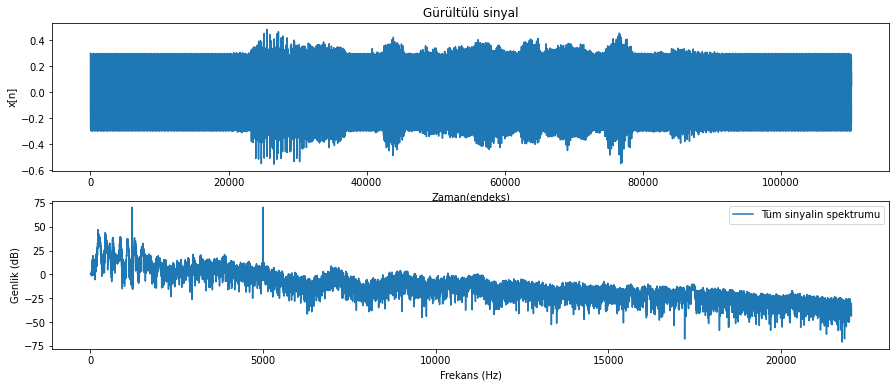

In [ ]:
url = 'https://github.com/barisbozkurt/dataDumpForCourses/raw/master/exampleSpeech.wav'
urllib.request.urlretrieve(url,'exampleSpeech.wav')
konusma_sinyali, ornekleme_fr = sf.read('exampleSpeech.wav')

#Gürültü oluşturup ekleyelim
t = np.arange(0, konusma_sinyali.size / ornekleme_fr, 1/ornekleme_fr)
gurultu = np.cos(2 * np.pi * 1200 * t) + np.cos(2 * np.pi * 5000 * t)
gurultulu_konusma_sinyali = konusma_sinyali + gurultu * 0.15

fig = plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(gurultulu_konusma_sinyali)
plt.title("Gürültülü sinyal");
plt.xlabel('Zaman(endeks)')
plt.ylabel('x[n]')
plt.subplot(2,1,2)
genlik_spek = genlik_spektrumu(gurultulu_konusma_sinyali, ornekleme_fr)
plt.plot(genlik_spek,label='Tüm sinyalin spektrumu')
plt.xlabel('Frekans (Hz)')
plt.ylabel('Genlik (dB)')
plt.legend();
print('Gürültülü sinyal')
Audio(gurultulu_konusma_sinyali, rate=ornekleme_fr)

Şekil 4.25: Tonal gürültü eklenmiş konuşma sinyali ve spektrumu

Ses kaydını dinlediyseniz gürültü olarak eklenmiş iki tonun işitsel olarak oldukça rahatsız edici olduklarını deneyimlemişsinizdir. Gürültülü sinyalin spektrogramına da bakalım. 

Gürültülü sinyal spektrogramı


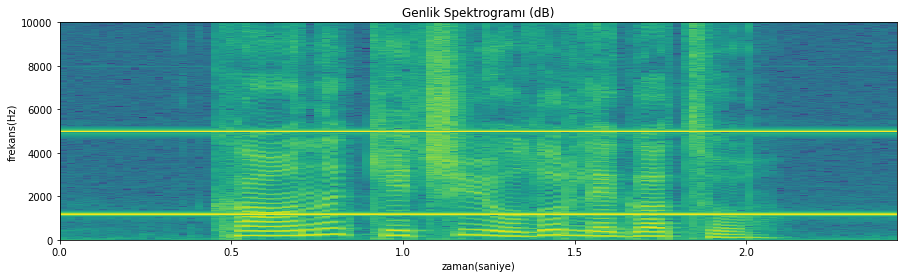

In [ ]:
eksen_limitleri = {'y':(0, 10000)}
print('Gürültülü sinyal spektrogramı')
spektrogram_cizdir(gurultulu_konusma_sinyali, pencereFonksiyonAdi='hann', pencereGenisligi=2048, pencereKaydirmaMiktari=1024, fftN=ornekleme_fr, ornekleme_fr=ornekleme_fr, eksen_limitleri=eksen_limitleri)

Şekil 4.26: Tonal gürültü eklenmiş konuşma sinyali spektrogramı

1200 Hz ve 5000 Hz'deki tonları düz çizgiler olarak görebiliyoruz. Şimdi amacımız frekans uzayında filtreleme ile bu iki bileşenden kurtulmak. Bunu spektrumda ilgili bölgeleri sıfır ile çarparak gerçekleştireceğiz. 

In [ ]:
gurultu_frekanslari = [1200, 5000]

ornek_sayisi = gurultulu_konusma_sinyali.size
gurultulu_spek = np.fft.fft(gurultulu_konusma_sinyali, ornek_sayisi)
gurultu_frekans_endeksleri = np.array(gurultu_frekanslari) * ornek_sayisi / ornekleme_fr

bastirma_bant_genisligi_n = 600#tek bir noktayı değil, bir bantı sıfırlayacağız, genişliğini tahmini seçtik, başka değerler de deneybilirsiniz
for gurultu_fr_endeksi in gurultu_frekans_endeksleri:
  gurultu_fr_endeksi_int = int(gurultu_fr_endeksi)
  sifirlanacak_endeksler = np.arange(gurultu_fr_endeksi_int - bastirma_bant_genisligi_n//2 , 
                              gurultu_fr_endeksi_int + bastirma_bant_genisligi_n//2)
  gurultulu_spek[sifirlanacak_endeksler] = 0
  #!!!Önemli: spektrumun simetrisini bozmamamız lazım, orta noktaya göre simetrik
  # yerlerde aynı işlemi uygulamalıyız
  gurultulu_spek[ornek_sayisi-sifirlanacak_endeksler] = 0

#Ters Fourier dönüşüm ile temzilenmiş sinyalimizi elde edelim
temizlenmis_sinyal = np.fft.ifft(gurultulu_spek, ornek_sayisi)
#Hesaplama hassasiyeti sınırlı olduğu için çok küçük sanal bileşenler olabilir, atalım
temizlenmis_sinyal = np.real(temizlenmis_sinyal)
print('Temizlenmiş sinyal')
Audio(temizlenmis_sinyal, rate=ornekleme_fr)

Temizlenmiş sinyal


Temizlenmiş sinyal spektrogramı


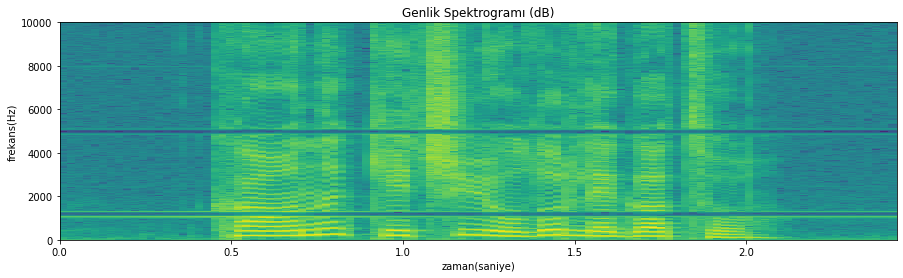

In [ ]:
eksen_limitleri = {'y':(0, 10000)}
print('Temizlenmiş sinyal spektrogramı')
spektrogram_cizdir(temizlenmis_sinyal, pencereFonksiyonAdi='hann', pencereGenisligi=2048, pencereKaydirmaMiktari=1024, fftN=ornekleme_fr, ornekleme_fr=ornekleme_fr, eksen_limitleri=eksen_limitleri)

Şekil 4.27: Frekans uzayında filtreleme sonrası sinyal spektrogramı

Temizlerken sinyalde de bir miktar kaybımız oldu, ancak sinyal görece dinlenebilir hale geldi. 

#### Önerilen diğer kaynaklar

Bu defterin içeriğine benzer ve geniş kapsamlı içerikleri Meinard Müller'ın araştırma ekibinin hazırladığı defterler arasında bulabilirsiniz:
https://www.audiolabs-erlangen.de/resources/MIR/FMP/C0/C0.html

Örneğin pencerelemenin spektrum ve spektrograma etkisi üzerine bir defter için bakınız:  
https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_STFT-Window.html


Fourier Dönüşümü ve STFT üzerine bir başka defter için bakınız: https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms1_wideband_narrowband.html


Hazır STFT fonksiyonu kullanmak isterseniz Librosa'nın ilgili fonksiyonunu tercih edebilirsiniz:

https://librosa.org/doc/latest/generated/librosa.stft.html


İlk 4 defterimizde sayısal sinyal işlemenin temel kavramlarını ele aldık. Sonraki defterlerimizde müzik sinyal işleme konularını ele almaya başlıyoruz. Buraya kadar olan içerik ilginizi çekti ise son iki defterin bilgilerini konuşma sinyali üzerine uygulayan bir defter için Ek-2'ye bakmanızı öneririz.  

**Yazar:** Barış Bozkurt, **editör:** Ahmet Uysal

---

